In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
d=pd.read_csv('Demographics.csv')
p=pd.read_csv('Products.csv')
t=pd.read_csv('Transactions.csv')
s=pd.read_csv('StorePromotions.csv')

In [3]:
t.shape,d.shape,p.shape,s.shape

((261507, 4), (5908, 7), (3449, 2), (1740, 5))

In [4]:
t.Product_ID.shape,t.User_ID.shape

((261507,), (261507,))

In [5]:
d.User_ID.shape

(5908,)

In [6]:
t.dtypes

Date          object
User_ID        int64
Product_ID    object
Purchase       int64
dtype: object

In [7]:
t_merge=pd.merge(t,p,on='Product_ID',how='left')

In [8]:
t_merge

,Date,User_ID,Product_ID,Purchase,Product_Category
0,28-9-2018,1000001,P00069042,837,3
1,29-7-2018,1000001,P00117942,884,4
2,28-7-2018,1000001,P00258742,691,4
3,27-7-2018,1000001,P00142242,788,7
4,29-7-2018,1000001,P00297042,784,7
...,...,...,...,...,...
261502,12-9-2018,1007092,P1003112,2500,11
261503,7-9-2018,1007095,P1003381,1750,11
261504,3-7-2018,1007099,P00250642,593,10
261505,4-8-2018,1007099,P00023142,704,4


In [9]:
#t_merge['Date']=pd.to_datetime(t_merge['Date'])

In [10]:
#t_merge['Week_Number'] = t_merge['Date'].dt.week

In [11]:
t_merge

,Date,User_ID,Product_ID,Purchase,Product_Category
0,28-9-2018,1000001,P00069042,837,3
1,29-7-2018,1000001,P00117942,884,4
2,28-7-2018,1000001,P00258742,691,4
3,27-7-2018,1000001,P00142242,788,7
4,29-7-2018,1000001,P00297042,784,7
...,...,...,...,...,...
261502,12-9-2018,1007092,P1003112,2500,11
261503,7-9-2018,1007095,P1003381,1750,11
261504,3-7-2018,1007099,P00250642,593,10
261505,4-8-2018,1007099,P00023142,704,4


In [12]:
#tsum=t.groupby('User_ID').agg({'Product_ID':'count','Purchase':'sum'})

In [13]:
tmean=t_merge.groupby(['User_ID']).agg({'Product_ID':'count','Purchase':'sum'})

In [14]:
tmean

,Product_ID,Purchase
User_ID,,
1000001,12,9979
1000002,37,28416
1000003,10,7329
1000005,55,38641
1000006,19,14162
...,...,...
1007081,1,3550
1007091,4,5701
1007092,2,6050


In [15]:
tmean.dtypes

Product_ID    int64
Purchase      int64
dtype: object

In [16]:
tmean.reset_index(inplace=True)

In [17]:
tmean.rename(columns = {"Product_ID": "Product_count"},inplace=True)

In [18]:
tmean

,User_ID,Product_count,Purchase
0,1000001,12,9979
1,1000002,37,28416
2,1000003,10,7329
3,1000005,55,38641
4,1000006,19,14162
...,...,...,...
5880,1007081,1,3550
5881,1007091,4,5701
5882,1007092,2,6050
5883,1007095,1,1750


In [19]:
tpd_merge=pd.merge(tmean,d,on='User_ID',how='left')

In [20]:
tpd_merge.shape

(5893, 9)

In [21]:
tpd_merge.drop_duplicates(subset=None,keep='first',inplace=True)

In [22]:
tpd_merge

,User_ID,Product_count,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,12,9979,F,15.0,10,A,2,0
1,1000002,37,28416,M,69.0,16,C,4+,0
2,1000003,10,7329,M,34.0,15,A,3,0
3,1000005,55,38641,M,27.0,20,A,1,1
4,1000006,19,14162,F,51.0,9,A,1,0
...,...,...,...,...,...,...,...,...,...
5888,1007081,1,3550,F,NaN,17,B,4+,0
5889,1007091,4,5701,M,40.0,8,C,4+,1
5890,1007092,2,6050,M,45.0,8,C,4+,1
5891,1007095,1,1750,M,41.0,8,C,4+,1


In [23]:
tpd_merge.isnull().sum()

User_ID                       0
Product_count                 0
Purchase                      0
Gender                        0
Age                           3
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
dtype: int64

In [24]:
tpd_merge.dropna(inplace=True)

In [25]:
tpd_merge.dtypes

User_ID                         int64
Product_count                   int64
Purchase                        int64
Gender                         object
Age                           float64
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
dtype: object

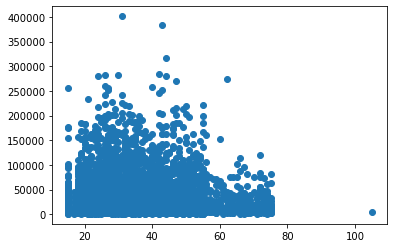

In [26]:
plt.scatter(tpd_merge.Age,tpd_merge.Purchase)

In [27]:
#tpd_merge.drop('Age',axis=1,inplace=True)

In [28]:
tpd_merge

,User_ID,Product_count,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,12,9979,F,15.0,10,A,2,0
1,1000002,37,28416,M,69.0,16,C,4+,0
2,1000003,10,7329,M,34.0,15,A,3,0
3,1000005,55,38641,M,27.0,20,A,1,1
4,1000006,19,14162,F,51.0,9,A,1,0
...,...,...,...,...,...,...,...,...,...
5885,1006040,83,63846,F,48.0,0,B,4+,1
5889,1007091,4,5701,M,40.0,8,C,4+,1
5890,1007092,2,6050,M,45.0,8,C,4+,1
5891,1007095,1,1750,M,41.0,8,C,4+,1


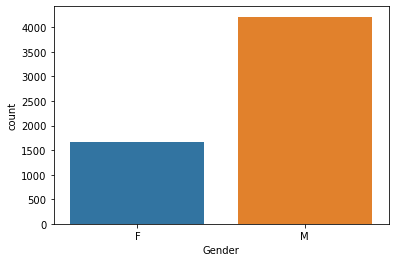

In [29]:
sns.countplot(tpd_merge.Gender)

In [30]:
#cols=['Occupation','Marital_Status']

In [31]:
for cols in ['Occupation','Marital_Status','Gender','City_Category','Stay_In_Current_City_Years']:
    tpd_merge[cols]=tpd_merge[cols].astype('category')

In [32]:
#tpd_merge.dtypes

In [33]:
x = tpd_merge.copy().drop("Purchase",axis=1)
y = pd.DataFrame(tpd_merge["Purchase"])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=132)

In [35]:
for cols in ['Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']:
    x_train[cols]=x_train[cols].cat.codes


<ipython-input-35-e4885f74a9b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[cols]=x_train[cols].cat.codes


In [36]:
x_train

,User_ID,Product_count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
5016,1005148,27,M,31.0,20,1,2,1
4974,1005105,25,M,51.0,7,2,1,1
1510,1001551,57,M,35.0,11,1,1,1
3983,1004087,9,M,15.0,4,2,1,0
222,1000221,8,F,35.0,0,1,2,1
...,...,...,...,...,...,...,...,...
4206,1004319,14,M,36.0,7,2,2,1
1721,1001766,10,F,50.0,0,2,0,1
4185,1004297,19,M,50.0,15,1,3,1
3906,1004009,54,M,20.0,7,2,4,0


In [37]:
x_train['Gender']=x_train['Gender'].cat.codes

<ipython-input-37-50f8cab8cdc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Gender']=x_train['Gender'].cat.codes


In [38]:
x_train

,User_ID,Product_count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
5016,1005148,27,1,31.0,20,1,2,1
4974,1005105,25,1,51.0,7,2,1,1
1510,1001551,57,1,35.0,11,1,1,1
3983,1004087,9,1,15.0,4,2,1,0
222,1000221,8,0,35.0,0,1,2,1
...,...,...,...,...,...,...,...,...
4206,1004319,14,1,36.0,7,2,2,1
1721,1001766,10,0,50.0,0,2,0,1
4185,1004297,19,1,50.0,15,1,3,1
3906,1004009,54,1,20.0,7,2,4,0


In [39]:
x_train.dtypes

User_ID                         int64
Product_count                   int64
Gender                           int8
Age                           float64
Occupation                       int8
City_Category                    int8
Stay_In_Current_City_Years       int8
Marital_Status                   int8
dtype: object

In [40]:
for cols in ['Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']:
    x_test[cols]=x_test[cols].cat.codes


<ipython-input-40-9dd5d047d66d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[cols]=x_test[cols].cat.codes


In [41]:
x_test['Gender']=x_test['Gender'].cat.codes

<ipython-input-41-7cf0c0624432>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Gender']=x_test['Gender'].cat.codes


In [42]:
x_test.dtypes

User_ID                         int64
Product_count                   int64
Gender                           int8
Age                           float64
Occupation                       int8
City_Category                    int8
Stay_In_Current_City_Years       int8
Marital_Status                   int8
dtype: object

In [43]:
sc=StandardScaler()
cols_to_norm = ['Age','Product_count']
x_train[cols_to_norm] = sc.fit_transform(x_train[cols_to_norm])

<ipython-input-43-fbea2cdd28b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[cols_to_norm] = sc.fit_transform(x_train[cols_to_norm])
C:\Users\siva\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [44]:
x_train

,User_ID,Product_count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
5016,1005148,-0.324121,1,-0.376010,20,1,2,1
4974,1005105,-0.361051,1,1.163635,7,2,1,1
1510,1001551,0.229829,1,-0.068081,11,1,1,1
3983,1004087,-0.656491,1,-1.607726,4,2,1,0
222,1000221,-0.674956,0,-0.068081,0,1,2,1
...,...,...,...,...,...,...,...,...
4206,1004319,-0.564166,1,0.008901,7,2,2,1
1721,1001766,-0.638026,0,1.086652,0,2,0,1
4185,1004297,-0.471841,1,1.086652,15,1,3,1
3906,1004009,0.174434,1,-1.222815,7,2,4,0


In [45]:
x_test[cols_to_norm] = sc.transform(x_test[cols_to_norm])

<ipython-input-45-d84396ca95cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[cols_to_norm] = sc.transform(x_test[cols_to_norm])
C:\Users\siva\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [46]:
x_test

,User_ID,Product_count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
2537,1002607,-0.527236,0,1.702510,0,2,0,0
96,1000096,-0.490306,0,-0.606957,16,2,2,1
1953,1002006,-0.674956,1,0.470794,0,0,1,1
1068,1001101,1.651635,1,0.470794,1,0,1,0
1965,1002018,1.928610,1,0.162865,16,1,1,0
...,...,...,...,...,...,...,...,...
2554,1002625,-0.397981,1,0.547777,7,2,3,0
732,1000751,-0.711886,0,-0.068081,17,2,3,0
2138,1002194,-0.601096,1,-0.376010,17,2,3,0
365,1000368,0.949965,1,-0.068081,0,2,1,0


# lm 

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import statsmodels.api as sm


In [50]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [51]:
train_pred=lm.predict(x_train)

In [52]:
test_pred=lm.predict(x_test)

In [53]:
print("coefficients:",lm.coef_)
print("coefficients",lm.intercept_)

coefficients: [[ 6.96748107e-03  3.93202649e+04  7.62210430e+00  1.79443941e+02
  -1.49609808e+00 -2.22170974e+01  2.54065766e+01 -2.79723543e+01]]
coefficients [25964.65442563]


In [54]:
rmse_train=sqrt(mean_squared_error(y_train,train_pred))
rmse_test=sqrt(mean_squared_error(y_test,test_pred))

In [55]:
rmse_train,rmse_test

(2537.008619235823, 2792.8674134535404)

In [56]:
mse_train=mean_squared_error(y_train,train_pred)
mse_test=mean_squared_error(y_test,test_pred)

In [57]:
mse_train,mse_test

(6436412.734076857, 7800108.389130668)

In [58]:
mape_train=np.mean(np.abs((y_train-train_pred)/y_train))*100

In [59]:
mape_test=np.mean(np.abs((y_test-test_pred)/y_test))*100

In [60]:
mape_train

Purchase    7.140367
dtype: float64

In [61]:
mape_test

Purchase    7.10973
dtype: float64

In [62]:
print("The R2 value on test dataset: {} \n".format(r2_score(y_pred=test_pred, y_true=y_test)))

print("The R2 value on train dataset: {} \n".format(r2_score(y_pred=train_pred, y_true=y_train)))

print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))

print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

The R2 value on test dataset: 0.9947617513918905 

The R2 value on train dataset: 0.9958535476529835 

The Mean Squared Error on train dataset: 6436412.734076857 

The Mean Squared Error on test dataset: 7800108.389130668 



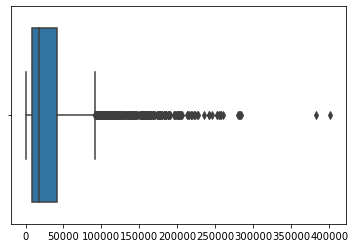

In [63]:
sns.boxplot(y_train)

In [64]:
results = sm.OLS(y_train,x_train).fit()

In [65]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Purchase   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.400e+05
Date:                Tue, 10 Nov 2020   Prob (F-statistic):                        0.00
Time:                        13:40:51   Log-Likelihood:                         -43558.
No. Observations:                4705   AIC:                                  8.713e+04
Df Residuals:                    4697   BIC:                                  8.718e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
User_ID                        0.0328      0.000    270.731      0.000       0.033       0.033
Product_count               3.932e+04     39.677    991.039      0.000    3.92e+04    3.94e+04
Gender                        10.9401     83.467      0.131      0.896    -152.694     174.574
Age                          179.2266     39.220      4.570      0.000     102.338     256.116
Occupation                    -1.4149      5.932     -0.239      0.811     -13.044      10.214
City_Category                -21.5301     52.165     -0.413      0.680    -123.798      80.738
Stay_In_Current_City_Years    25.9774     28.930      0.898      0.369     -30.739      82.694
Marital_Status               -28.4965     79.098     -0.360      0.719    -183.566     126.573
==============================================================================
Omnibus:                     1007.820   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32666.556
Skew:                           0.278   Prob(JB):                         0.00
Kurtosis:                      15.897   Cond. No.                     2.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# logistic

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix


In [67]:
IQR=tpd_merge['Purchase'].quantile(0.75)-tpd_merge['Purchase'].quantile(0.25)

In [68]:
ow=tpd_merge['Purchase'].quantile(0.75)+1.5*IQR
ow

91338.875

In [69]:
tpd_merge.head()

,User_ID,Product_count,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,12,9979,F,15.0,10,A,2,0
1,1000002,37,28416,M,69.0,16,C,4+,0
2,1000003,10,7329,M,34.0,15,A,3,0
3,1000005,55,38641,M,27.0,20,A,1,1
4,1000006,19,14162,F,51.0,9,A,1,0


In [70]:
tpd_merge.Purchase[tpd_merge.Purchase<ow]=0

<ipython-input-70-33c281052c6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tpd_merge.Purchase[tpd_merge.Purchase<ow]=0


In [71]:
tpd_merge.Purchase[tpd_merge.Purchase>=ow]=1

<ipython-input-71-8f4dbcc03beb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tpd_merge.Purchase[tpd_merge.Purchase>=ow]=1


In [72]:
tpd_merge.head(20)

,User_ID,Product_count,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,12,0,F,15.0,10,A,2,0
1,1000002,37,0,M,69.0,16,C,4+,0
2,1000003,10,0,M,34.0,15,A,3,0
3,1000005,55,0,M,27.0,20,A,1,1
4,1000006,19,0,F,51.0,9,A,1,0
5,1000007,2,0,M,37.0,1,B,1,1
6,1000008,49,0,M,34.0,12,C,4+,1
7,1000009,29,0,M,30.0,17,C,0,0
8,1000010,122,1,F,44.0,1,B,4+,1
9,1000011,40,0,F,30.0,1,C,1,0


C:\Users\siva\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


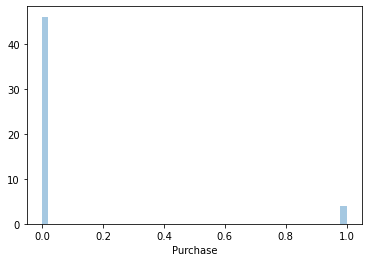

In [73]:
sns.distplot(tpd_merge.Purchase)

In [74]:
tpd_merge.Purchase.value_counts()

0    5415
1     467
Name: Purchase, dtype: int64

In [75]:
x = tpd_merge.copy().drop("Purchase",axis=1)
y = tpd_merge["Purchase"]

C:\Users\siva\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


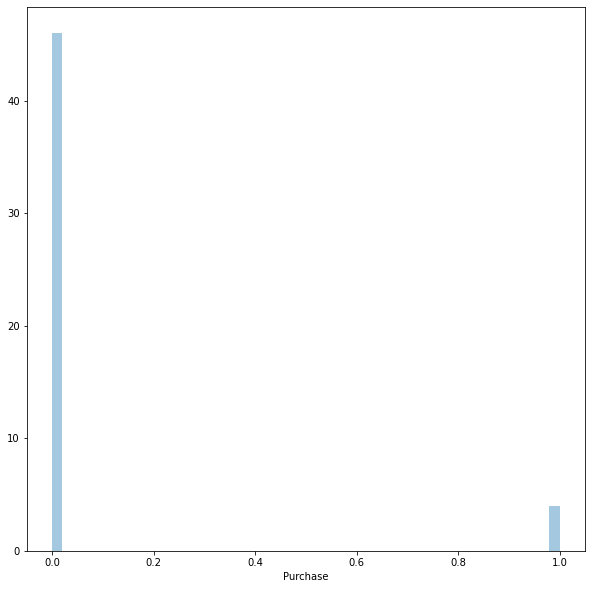

In [76]:
plt.figure(figsize=(10,10))
sns.distplot(y)

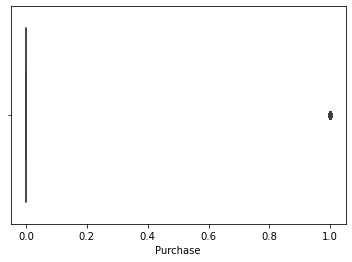

In [77]:
sns.boxplot(y)

In [78]:
y.dtypes

dtype('int64')

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=200)

In [80]:
pd.DataFrame(y_train).Purchase.value_counts()

0    4351
1     354
Name: Purchase, dtype: int64

In [81]:
y_test.dtypes

dtype('int64')

In [82]:
for cols in ['Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']:
    x_train[cols]=x_train[cols].cat.codes


<ipython-input-82-e4885f74a9b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[cols]=x_train[cols].cat.codes


In [83]:
for cols in ['Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']:
    x_test[cols]=x_test[cols].cat.codes


<ipython-input-83-9dd5d047d66d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[cols]=x_test[cols].cat.codes


In [84]:
x_train['Gender']=x_train['Gender'].cat.codes

<ipython-input-84-50f8cab8cdc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Gender']=x_train['Gender'].cat.codes


In [85]:
x_test['Gender']=x_test['Gender'].cat.codes

<ipython-input-85-7cf0c0624432>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Gender']=x_test['Gender'].cat.codes


In [86]:
y_train.value_counts()

0    4351
1     354
Name: Purchase, dtype: int64

In [87]:
sc=StandardScaler()
cols_to_norm = ['Age','Product_count']
x_train[cols_to_norm] = sc.fit_transform(x_train[cols_to_norm])

<ipython-input-87-fbea2cdd28b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[cols_to_norm] = sc.fit_transform(x_train[cols_to_norm])
C:\Users\siva\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [88]:
x_test[cols_to_norm] = sc.transform(x_test[cols_to_norm])

<ipython-input-88-d84396ca95cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[cols_to_norm] = sc.transform(x_test[cols_to_norm])
C:\Users\siva\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
lom=LogisticRegression()

In [91]:
lom.fit(x_train,y_train)

LogisticRegression()

In [92]:
train_pred=lom.predict(x_train)

In [93]:
test_pred=lom.predict(x_test)

In [94]:
y_test.value_counts()

0    1064
1     113
Name: Purchase, dtype: int64

In [95]:
accuracy_score(y_train,train_pred)

0.9247608926673752

In [96]:
accuracy_score(y_test,test_pred)

0.9039932030586236

In [97]:
confusion_matrix(y_train,train_pred)

array([[4351,    0],
       [ 354,    0]], dtype=int64)

In [98]:
confusion_matrix(y_test,test_pred)

array([[1064,    0],
       [ 113,    0]], dtype=int64)

In [99]:
classification_report(y_test,test_pred)

C:\Users\siva\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.90      1.00      0.95      1064\n           1       0.00      0.00      0.00       113\n\n    accuracy                           0.90      1177\n   macro avg       0.45      0.50      0.47      1177\nweighted avg       0.82      0.90      0.86      1177\n'

In [100]:
y_test.head(20)

4305    0
532     0
2097    0
3370    0
3592    0
2984    0
876     0
111     0
5446    0
4460    0
2030    0
3381    0
5503    0
1097    0
2309    0
3055    0
1303    0
369     0
37      0
5386    1
Name: Purchase, dtype: int64

In [101]:
from sklearn.svm import SVC
svc = SVC(C=10,kernel='rbf')
svc.fit(X = x_train,y = y_train)
test_pred2=svc.predict(x_test)
train_pred2=svc.predict(x_train)


In [102]:
print(accuracy_score(y_train,train_pred2))
print(accuracy_score(y_test,test_pred2))

0.9247608926673752
0.9039932030586236


In [103]:
from sklearn.model_selection import GridSearchCV
param_grid = {

'C': [0.001, 0.01, 1],
'gamma': [0.001, 0.01, 1], 
'kernel':['rbf', 'sigmoid']}

 
svc_cv_grid = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5)

In [104]:
svc_cv_grid.fit(X = x_train,y = y_train)
test_pred3=svc_cv_grid.predict(x_test)
train_pred3=svc_cv_grid.predict(x_train)


In [105]:
print(accuracy_score(y_train,train_pred3))
print(accuracy_score(y_test,test_pred3))

0.9247608926673752
0.9039932030586236


In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='brute')
knn_classifier.fit(x_train,y_train)
test_pred4=knn_classifier.predict(x_test)
train_pred4=knn_classifier.predict(x_train)



In [107]:
print(accuracy_score(y_train,train_pred4))
print(accuracy_score(y_test,test_pred4))

1.0
0.8912489379779099


In [108]:
x_train.head(1)

,User_ID,Product_count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
2657,1002731,1.00406,1,0.018412,7,2,1,0


# Kmeans

In [109]:
sc=StandardScaler()

x_train_k = sc.fit_transform(x_train)
x_test_k = sc.transform(x_test)

In [111]:
from sklearn.cluster import KMeans
wss= {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(x_train_k)
    #clusters = kmeans.labels_
    wss[k] = kmeans.inertia_ 

In [112]:
wss

{1: 37639.999999999905,
 2: 32424.098024851945,
 3: 29107.51221075568,
 4: 26392.49662958109,
 5: 24773.664158035434,
 6: 23506.780816149036,
 7: 22429.222517715214,
 8: 21242.729872003314,
 9: 20550.211828181826,
 10: 19963.14104130942,
 11: 19196.838896060857,
 12: 18676.411665374366,
 13: 18126.846406619912,
 14: 17712.710820281736}

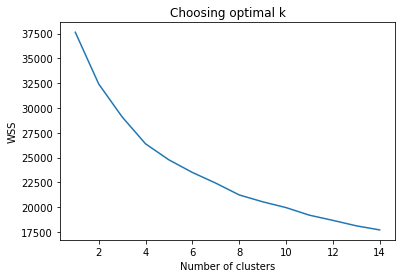

In [113]:
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.title("Choosing optimal k")
plt.show()

In [114]:
#!pip install kneed

In [115]:
from kneed import KneeLocator
#kl = KneeLocator(list(range(1, 15, 1)), wss, curve="convex", direction="decreasing")
#kl.elbow


In [116]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

In [117]:
X_train_std=pd.DataFrame(x_train_k)

In [118]:
X_test_std=pd.DataFrame(x_test_k)

In [119]:
X_test_std.shape

(1177, 8)

In [120]:
indices=X_train_std.sample(frac=0.9,random_state=123).index
print(indices)

Int64Index([4506, 3774, 2740,  248, 4237, 1259, 3025, 4567, 4271, 2377,
            ...
            2169, 1494,  703,  862, 3899, 2741, 3624, 3427, 2969, 1507],
           dtype='int64', length=4234)


In [121]:
Alpha=X_train_std.iloc[indices,:]

In [122]:
Alpha.shape

(4234, 8)

In [123]:
kmeans = KMeans(n_clusters=7,random_state=456)
kmeans1 = kmeans.fit(X_train_std)
print(len(kmeans1.labels_))
X_train_std['clus']=kmeans1.labels_
centroids = kmeans1.cluster_centers_

4705


In [124]:
centroids

array([[-0.09861261, -0.1030057 ,  0.62026088, -0.05648165,  0.06926658,
        -1.77392215,  0.04388397, -0.04938389],
       [-0.0151221 , -0.23728585,  0.62479311, -0.42745457, -0.65956969,
         0.43980266,  0.01760829, -0.84647907],
       [-0.00867387, -0.25038314,  0.62479311, -0.03517442,  1.14487094,
         0.41686631,  0.00383189, -0.84647907],
       [ 0.06932739, -0.23176413, -1.60052981, -0.30136144, -0.28849344,
         0.00370563, -0.01111676, -0.84647907],
       [-0.07291411,  2.7372077 ,  0.14075394, -0.22324115, -0.08806657,
        -1.02813761, -0.09833533, -0.118976  ],
       [ 0.07614123, -0.21586387, -1.60052981,  0.48291129, -0.15896679,
         0.12668837, -0.03880467,  1.15908013],
       [ 0.00285761, -0.2461595 ,  0.62479311,  0.41039898,  0.13658512,
         0.46389256,  0.02191265,  1.17952897]])

In [127]:
kmeans1.labels_

array([1, 6, 1, ..., 0, 3, 6])

In [128]:
labels_test = kmeans.predict(X_test_std)

In [129]:
X_train_std.head(1)

,0,1,2,3,4,5,6,7,clus
0,-0.17622,1.00406,0.624793,0.018412,-0.189753,0.840016,-0.678053,-0.846479,1


In [130]:
X_test_std.head(1)

,0,1,2,3,4,5,6,7
0,0.793823,-0.767921,-1.60053,1.102244,0.603131,0.840016,1.653994,-0.846479


In [131]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, 14):
    kmeans1 = KMeans(n_clusters=k)
    kmeans1.fit(X_train_std)
    score = silhouette_score(X_train_std, kmeans.labels_)
    silhouette_coefficients.append(score)

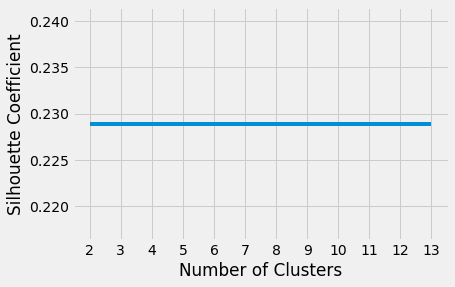

In [132]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 14), silhouette_coefficients)
plt.xticks(range(2, 14))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [133]:
indices=X_train_std.sample(frac=0.9,random_state=123).index
print(indices)

Int64Index([4506, 3774, 2740,  248, 4237, 1259, 3025, 4567, 4271, 2377,
            ...
            2169, 1494,  703,  862, 3899, 2741, 3624, 3427, 2969, 1507],
           dtype='int64', length=4234)


In [134]:
Alpha=X_train_std.iloc[indices,:]

In [135]:
Alpha.shape

(4234, 9)

In [136]:
kmeans = KMeans(n_clusters=7,random_state=456)
kmeans2=kmeans.fit(Alpha)
print(len(kmeans2.labels_))
Alpha['clus']=kmeans2.labels_

4234


<ipython-input-136-9718021f676b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alpha['clus']=kmeans2.labels_


In [137]:
g1=X_train_std.loc[indices,'clus']
g2=Alpha.clus

In [138]:
adjusted_rand_score(g1,g2)

1.0

In [139]:
x_train['clus']=kmeans1.labels_

<ipython-input-139-eeb307bdf115>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['clus']=kmeans1.labels_


In [140]:
x_train.head(1)

,User_ID,Product_count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,clus
2657,1002731,1.00406,1,0.018412,7,2,1,0,2


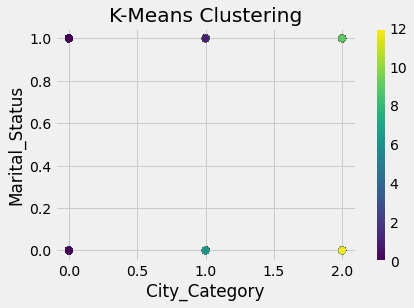

In [141]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x_train['City_Category'],x_train['Marital_Status'],
                     c=x_train.clus,s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('City_Category')
ax.set_ylabel('Marital_Status')
plt.colorbar(scatter)